# Übung 2 - Bildverarbeitungsoperatoren 

**Name:** NICHT VERGESSEN!, **Matr.-Nr.:** NICHT VERGESSEN!
<br>
**Name:** NICHT VERGESSEN!, **Matr.-Nr.:** NICHT VERGESSEN!

---

## Bearbeitungszeitraum

**Bearbeitungsbegin:** ...
<br>
**Abgabe:** ...

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die praktische Anwendung, der in der Vorlesung eingeführten Bildverarbeitungsoperatoren, wie z.B. Filterung im Ortsraum zur globalen Rauschunterdrückung, morphologische Operatoren usw.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

### Aufgabenbeschreibung
Der Begriff **Leukämie**, auch Blutkrebs genannt, steht für eine Gruppe von Krebserkrankungen des blutbildenden Systems. Die einzelnen Formen unterscheiden sich bezüglich Häufigkeit, Ursachen, Behandlungsmöglichkeiten und Heilungsaussichten zum Teil stark voneinander. Leukämie geht von den Knochenmarkszellen aus und ist in der Regel durch eine stark erhöhte Zahl weißer Blutkörperchen im Blut gekennzeichnet. 

![BlutBild](Blutbild_LeukaemieVsGesund.jpg)


***Eine Leukämie geht mit Veränderungen im Blutbild einher*** (Bildquelle: Apotheken-umschau)




             

### 1. Aufgabe - Einlesen und Visualisieren eines Leukämie(CLL)-Zellenbildes

Die chronische lymphatische Leukämie (CLL) ist ein niedrigmaligne, in der westlichen Welt die am häufigsten vorkommende Leukämieform. Die Diagnose dieser Erkrankung erfolgt zunächst im Blutbild. Lesen sie die Datei "leukaemie.jpg" ein, um ein solches Blutbild darzustellen. Visualisieren Sie das eingelesene Bild (verwenden Sie die Funktionen `imshow` und `show`). Konvertieren Sie die .jpg-Datei in ein numpy-array.



In [1]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray
import cv2
 
# load the image and convert into
# numpy array
img = Image.open('leukaemie.jpg')
numpydata = asarray(img)
 
# data
print(numpydata)

img_cv = cv2.imread('leukaemie.jpg',0)
cv2.imshow('asd',img_cv)

[[[230 227 222]
  [228 225 220]
  [228 221 215]
  ...
  [205 169 169]
  [205 169 169]
  [204 168 168]]

 [[233 230 225]
  [231 228 223]
  [229 224 218]
  ...
  [205 169 169]
  [205 169 169]
  [204 168 168]]

 [[236 233 228]
  [234 231 226]
  [232 227 221]
  ...
  [207 168 169]
  [207 168 169]
  [206 167 168]]

 ...

 [[222 193 198]
  [222 193 198]
  [221 192 197]
  ...
  [209 172 179]
  [209 172 179]
  [209 172 179]]

 [[221 192 197]
  [221 192 197]
  [220 191 196]
  ...
  [210 173 180]
  [210 173 180]
  [210 173 180]]

 [[219 190 194]
  [219 190 194]
  [218 189 193]
  ...
  [213 177 181]
  [211 175 179]
  [209 173 177]]]


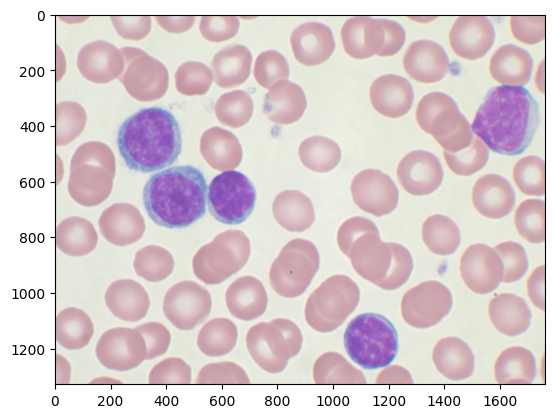

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('leukaemie.jpg')
imgplot = plt.imshow(img)
plt.show()

### 2. Aufgabe - Orts- und Frequenzraumanalyse sowie Filterung des Zellbildes

Im Rahmen dieser Aufgabe sollen Sie Ihre Kenntnisse mit globalen Bildstörungen einsetzen, indem Sie auf diese Störungen zurückzuführende Veränderungen im Frequenzraum erkennen und eliminieren. Um solch eine spektrale Bildanalyse durchführen zu können, müssen Sie mittels Fourierttrasformation vom Ortsraum in den Frequenzraum wechseln. Dazu können Sie aus `numpy` die ensprechende mathematische Funktion namens `fft` benutzen. Ebenfalls lässt sich die `fft` Funktion der `cv2` library einsetzen und ist ggf. bis zu 3x performanter. 

**2.1: Globale Bildstörungen erzeugen, Orts- sowie Frequenzraum darstellen**
- Erzeugen Sie im ersten Schritt globale Bildstörungen (Rauschen). Globale Bildstörung kann z.B. Gauss-Rauschen, Salz-Pfeffer-Rauschen o.ä. periodische Bildartefakte sein (vgl. VL-Folien).
- Wenden Sie das erzeugte Rauschen auf das Bild `leukaemie.jpg` an. 
- Wenden Sie die Fouriertransformation sowohl auf das Grauwertbild als auch auf die verrauschte Kopie des Grauwertbildes an.
- Visualisieren Sie beide Bilder mit ihren jeweiligen Frequenzspektren dar (`subplot` mit 2x2-Raster)


**2.2: Histogramme erzeugen**
- Visualisieren Sie die Histogramme des verrauschten sowie des unverarbeiteten Originalbildes, um die Grauwertverteilungen darzustellen.


**2.3: Filterung im Frequenzraum**
- Führen Sie eine Filterung des verrauschten Bildes (im Frequenzraum!) durch, um die zuvor (in der Teilaufgabe 2.1) erzeugten Störungen wieder weitesgehend zu eliminieren
- Visualisieren Sie das gefilterte Bild sowie das dazugehörige Frequenzspektrum nebeneinander dar.

**2.4: Erläuterung der verwendeten Methoden**
- Erläutern Sie stichpunktartig die Funktionsweise der verwendeten Funktionen zur Rauscherzeugung sowie Rauschunterdrückung.
- Erläutern Sie stichpunktartig die Funktionsweise der eingesetzten FFT sowie iFFT! 


**Hinweise:**
- Beim Einlesen des Bildes (z.B. mit `imread` aus der Bibliothek `skimage`) den Parameter `as_gray` gleich 'True' setzen und mit diesem Graubild weiterarbeiten. Beim plotten müssen Sie ggf. dennoch `cmap='gray'` setzen.
- Falls Sie Gauss-Rauschen erzeugen, dann sollte der Sigma-Wert nicht das Maximum von 1.0 überschreiten - denn es reicht ein leichtes Rauschen, das zusätzlich zum Ortsraum auch im Frequenzraum erkennbar ist.
- Vor der Anwendung der Fouriertransformation müssen Sie die Bildgröße anpassen, da das Originalbild nicht quadratisch ist (vgl. VL-Folien zur FFT: Anzahl Zeilen/Spalten muss identisch sein!)
- Führen Sie die Filterung im Frequenzraum durch, weil es sich um eine globale Bildstörung handelt! Überlegen Sie vorher, was der Filter bewirken soll (glätten? Kanten hervorheben?, ..) und probieren Sie unterschiedliche Filterkerngrößen (3x3, 5x5,7x7) aus! Und denken Sie an die anschließende Rücktransformation!



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
img=cv2.imread("leukaemie.jpg",0)

In [5]:
print(img.shape)

(1329, 1764)


In [6]:
gauss_noise=np.zeros((1329, 1764),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.3).astype(np.uint8)

In [7]:
gn_img=cv2.add(img,gauss_noise)

Text(0.5, 1.0, 'Combined')

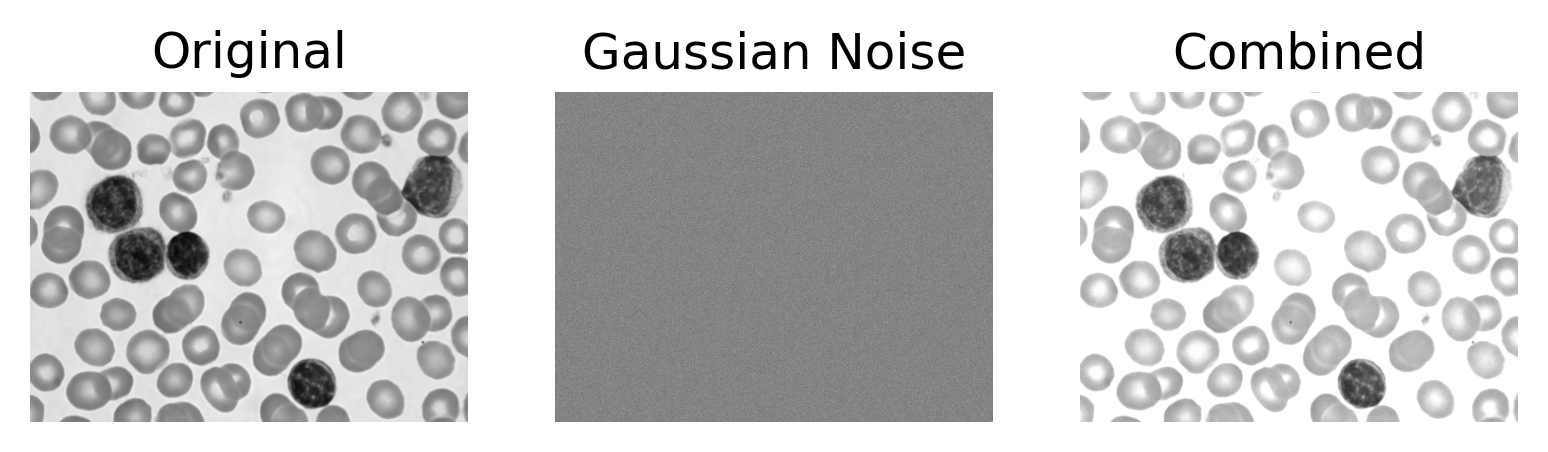

In [8]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

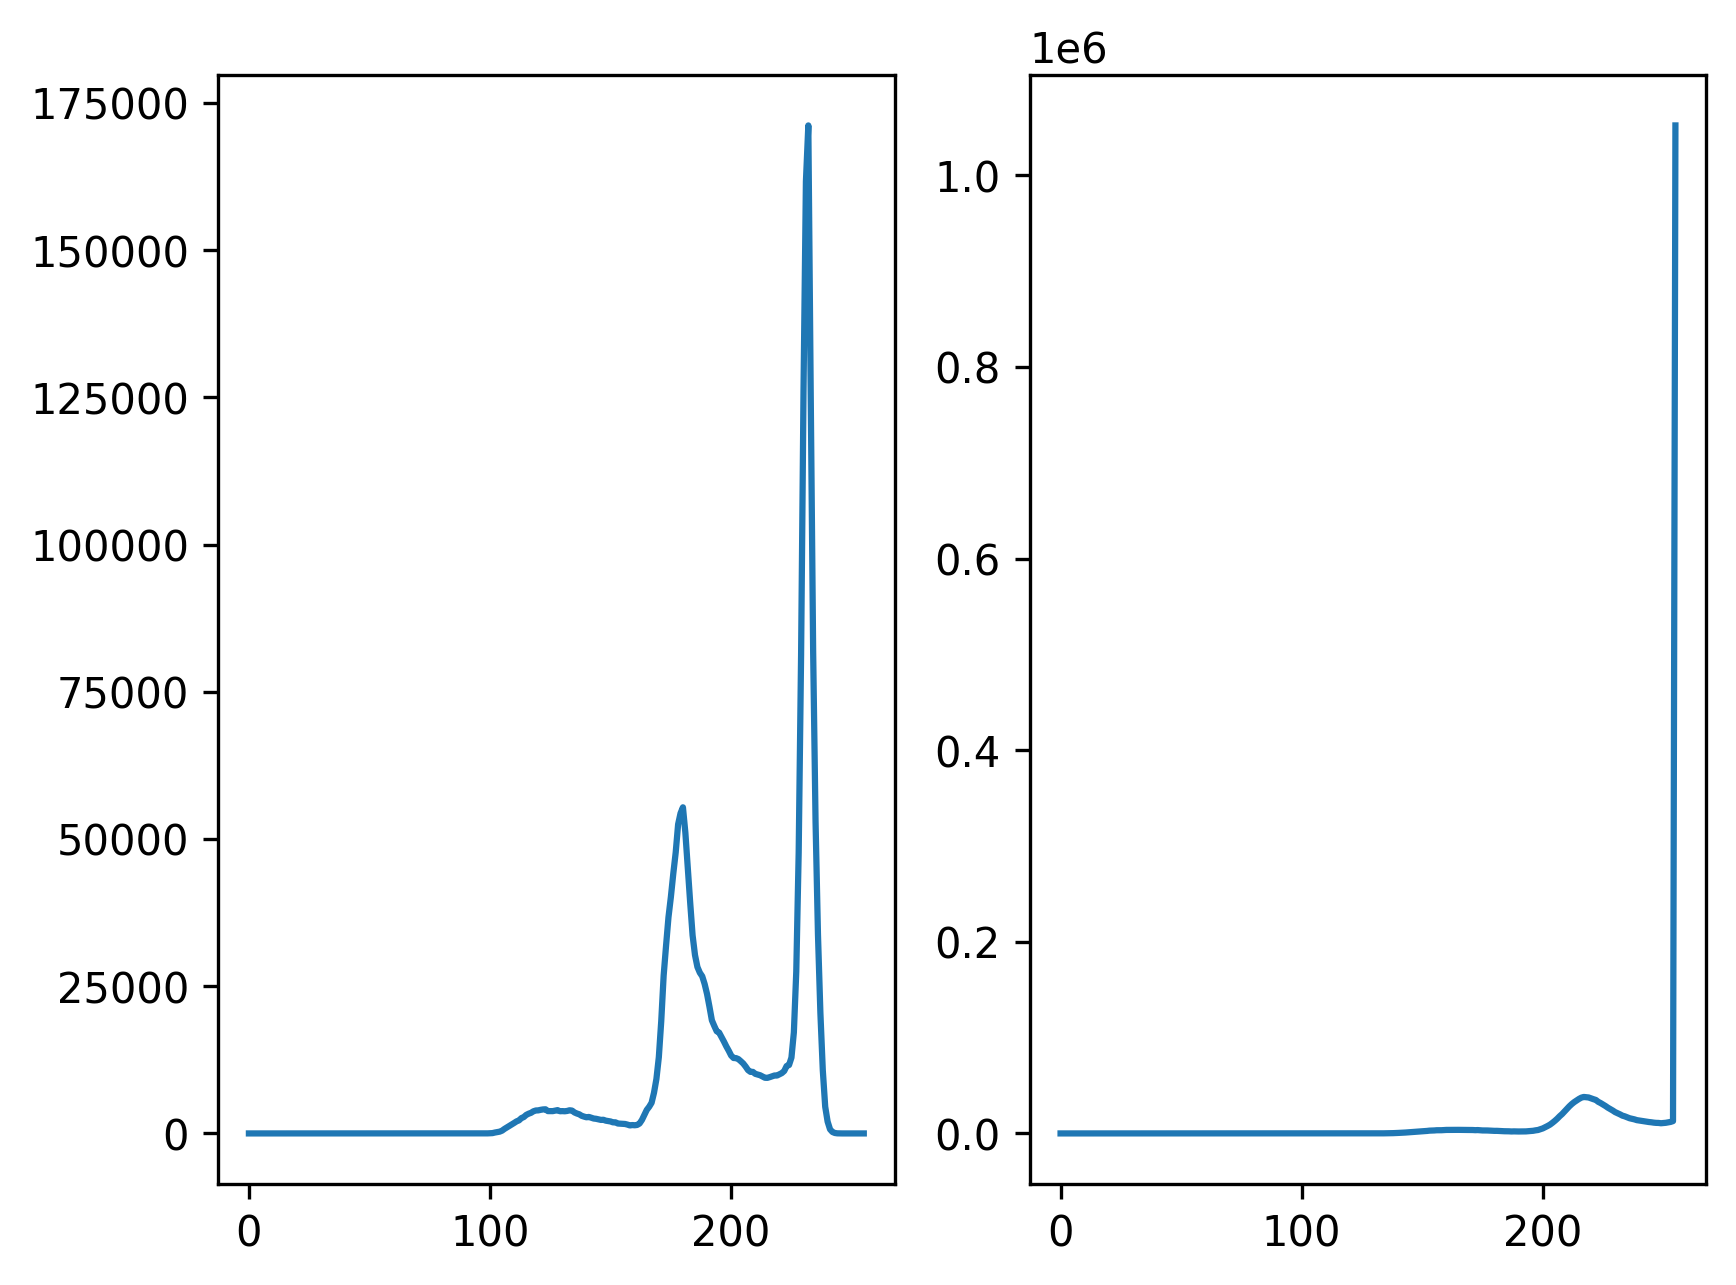

In [9]:

histr = cv2.calcHist([img],[0],None,[256],[0,256])
histr2 = cv2.calcHist([gn_img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
fig=plt.figure(dpi=300)
fig.add_subplot(1,2,1)
plt.plot(histr)
fig.add_subplot(1,2,2)
plt.plot(histr2)
plt.show()

In [10]:
import numpy as np 

import cv2 

from matplotlib import pyplot as plt 

image = gn_img

In [11]:
noiseless_image_bw = cv2.fastNlMeansDenoising(image, None, 20, 7, 21)

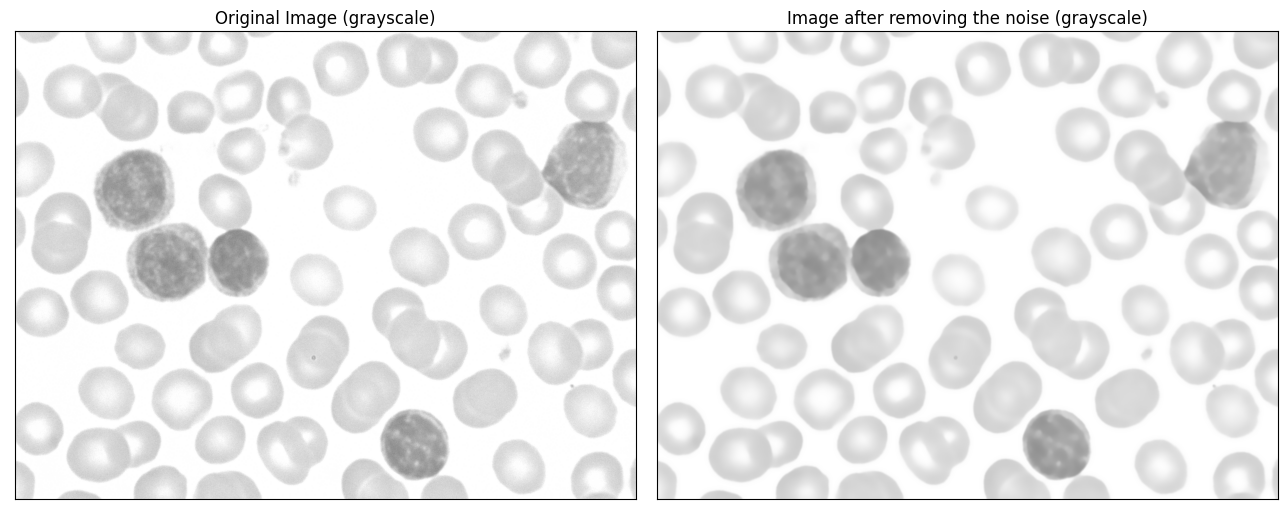

In [12]:
titles = ['Original Image (grayscale)','Image after removing the noise (grayscale)']
images = [image, noiseless_image_bw]
plt.figure(figsize=(13,5))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### 3. Morphologische Operationen
 
**3.1 Strukturen verkleinern/vergrößern, um schmale Verbindungen zu lösen/Lücken zu schließen**

Führen Sie folgende morphologische Operationen mit dem Originalbild `leukaemie.jpg` durch:
    - Erosion
    - Dilation
    - Opening
    - Closing
 
Hierbei können Sie sowohl `Skimage`- als auch `CV2`-Bibliotheken benutzen. Stellen Sie Ihre Ergebnisse in einem 2x2-subplot dar. 


**3.2 Merkmalsextraktion**

- Welche, der in der Teilaufgabe 3.1 eingesetzten morphologischen Operationen ist am besten geeignet, falls die Anzahl der Zellen im Bild gezählt werden soll? 

- Zählen Sie ALLE Zellen in diesem Bild, nachdem sie eine "passende" morphologische Operation durchgeführt haben. Tipp: Zur Detektion von Kreisen/Ellipsen können Sie die "Hough-Transformation" anwenden.

**3.3. Bonus**
Zählen Sie NUR die lila gefärbten Leukozyten.
 

**4. BONUSAUFGABE:** Detektieren Sie im folgenden Bild **alle Pfeile**. Treffen Sie die Entscheidung, ob die Pfeilspitze nach **rechts** oder nach **links** zeigt. 

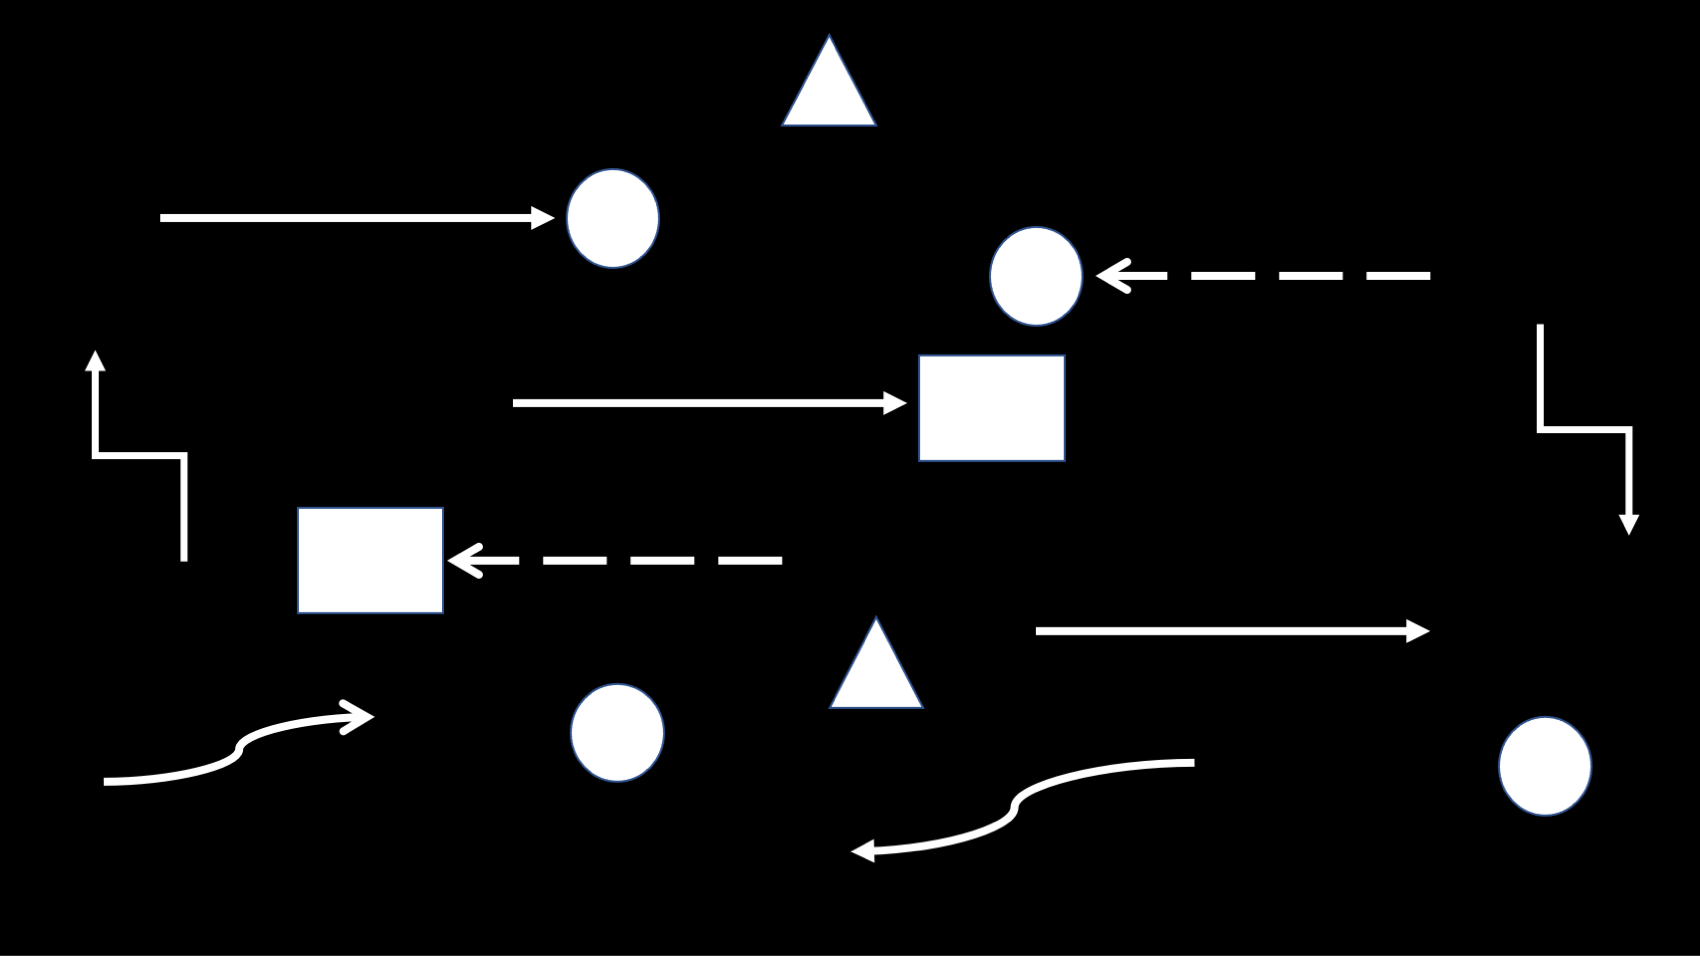

SyntaxError: 'return' outside function (2517860829.py, line 61)